In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training images:", x_train.shape)
print("Testing images:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training images: (50000, 32, 32, 3)
Testing images: (10000, 32, 32, 3)


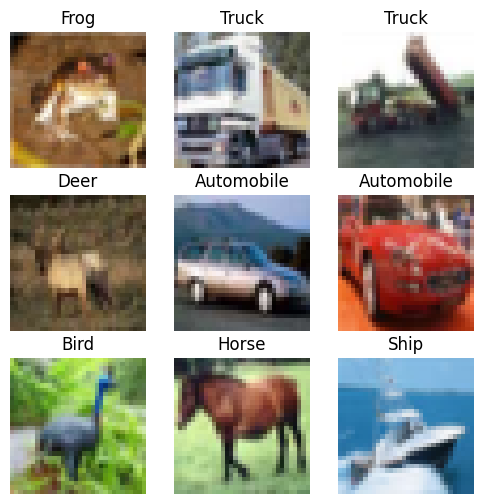

In [2]:
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()


In [3]:
# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0

print("Normalization done ✅")


Normalization done ✅


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Convolution + Pooling layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# Flatten + Dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 97ms/step - accuracy: 0.3493 - loss: 1.7862 - val_accuracy: 0.5345 - val_loss: 1.3151
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.5528 - loss: 1.2646 - val_accuracy: 0.5756 - val_loss: 1.2001
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 95ms/step - accuracy: 0.6093 - loss: 1.1092 - val_accuracy: 0.6218 - val_loss: 1.0812
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 101ms/step - accuracy: 0.6528 - loss: 0.9947 - val_accuracy: 0.6583 - val_loss: 0.9882
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.6816 - loss: 0.9302 - val_accuracy: 0.6719 - val_loss: 0.9406


Test Accuracy: 0.6718999743461609
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

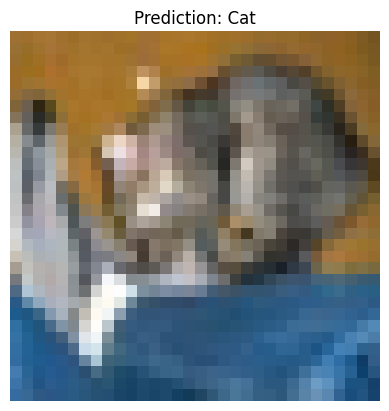

In [6]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)

# Predict first test image
import numpy as np

prediction = model.predict(x_test[:1])
predicted_class = class_names[np.argmax(prediction)]

plt.imshow(x_test[0])
plt.title(f"Prediction: {predicted_class}")
plt.axis("off")


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

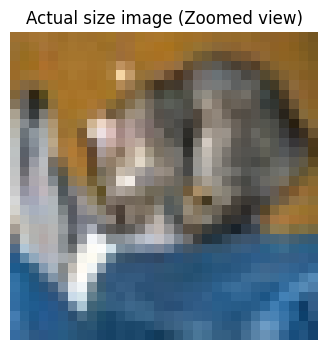

In [7]:
plt.figure(figsize=(4,4))   # image size perusaakudhu
plt.imshow(x_test[0])
plt.title("Actual size image (Zoomed view)")
plt.axis("off")


In [8]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train_m, y_train_m), (x_test_m, y_test_m) = mnist.load_data()

print("Training images:", x_train_m.shape)
print("Testing images:", x_test_m.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images: (60000, 28, 28)
Testing images: (10000, 28, 28)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

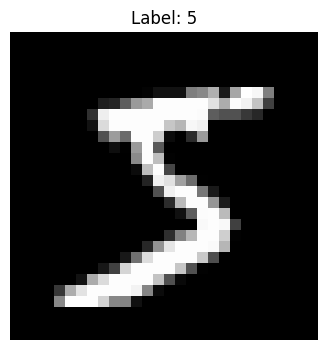

In [9]:
plt.figure(figsize=(4,4))
plt.imshow(x_train_m[0], cmap="gray")
plt.title(f"Label: {y_train_m[0]}")
plt.axis("off")
